# 二值图像距离变换

In [20]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [21]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [30]:
def togray(src):
    rgb = np.float64(src)
    dst = 0.299 * rgb[:,:,0] + 0.587 * rgb[:,:,1] + 0.114 * rgb[:,:,2]
    return cv2.convertScaleAbs(dst)

def tobinary(gray,thresh):
    dst = np.zeros_like(gray)
    idx = (gray >= thresh)
    dst[idx] = 255
    return dst

def distance_transform(src):
    dst = np.zeros_like(src)
    rows,cols = src.shape[0],src.shape[1]
    for x in range(4,rows - 4):
        for y in range(1,cols):
            if src[x,y] != 0:
               
                t1 = src[x - 3,y - 1] + 4
                t2 = src[x,y - 1] + 3
                t3 = src[x + 3,y] + 4
                t4 = src[x - 3,y]
                t5 = src[x,y]
                min_val = np.min([t1,t2,t3,t4,t5])
                dst[x + 1,y] = min_val
                dst[x,y] = min_val
                dst[x + 2,y] = min_val
    
    for x in range(rows - 4,0,-1):
        for y in range(cols - 2,0,-1):
            if src[x,y] != 0:
                t1 = src[x - 3,y + 1] + 4
                t2 = src[x,y + 1] + 3
                t3 = src[x + 3,y+1] + 4
                t4 = src[x + 3,y]
                t5 = src[x,y]
                min_val = np.min([t1,t2,t3,t4,t5])
                dst[x ,y] = min_val
                dst[x + 1,y] = min_val
                dst[x + 2,y] = min_val
    dst[dst > 255] = 255
    return dst

In [31]:
gray = togray(src)
binary = tobinary(gray,160)
dst = distance_transform(binary)

Text(0.5,1,'Gray')

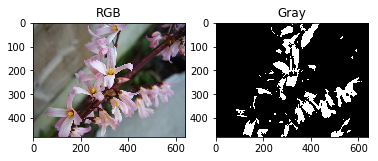

In [32]:
plt.subplot(121)
plt.imshow(src)
plt.title('RGB')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Gray')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/44936665